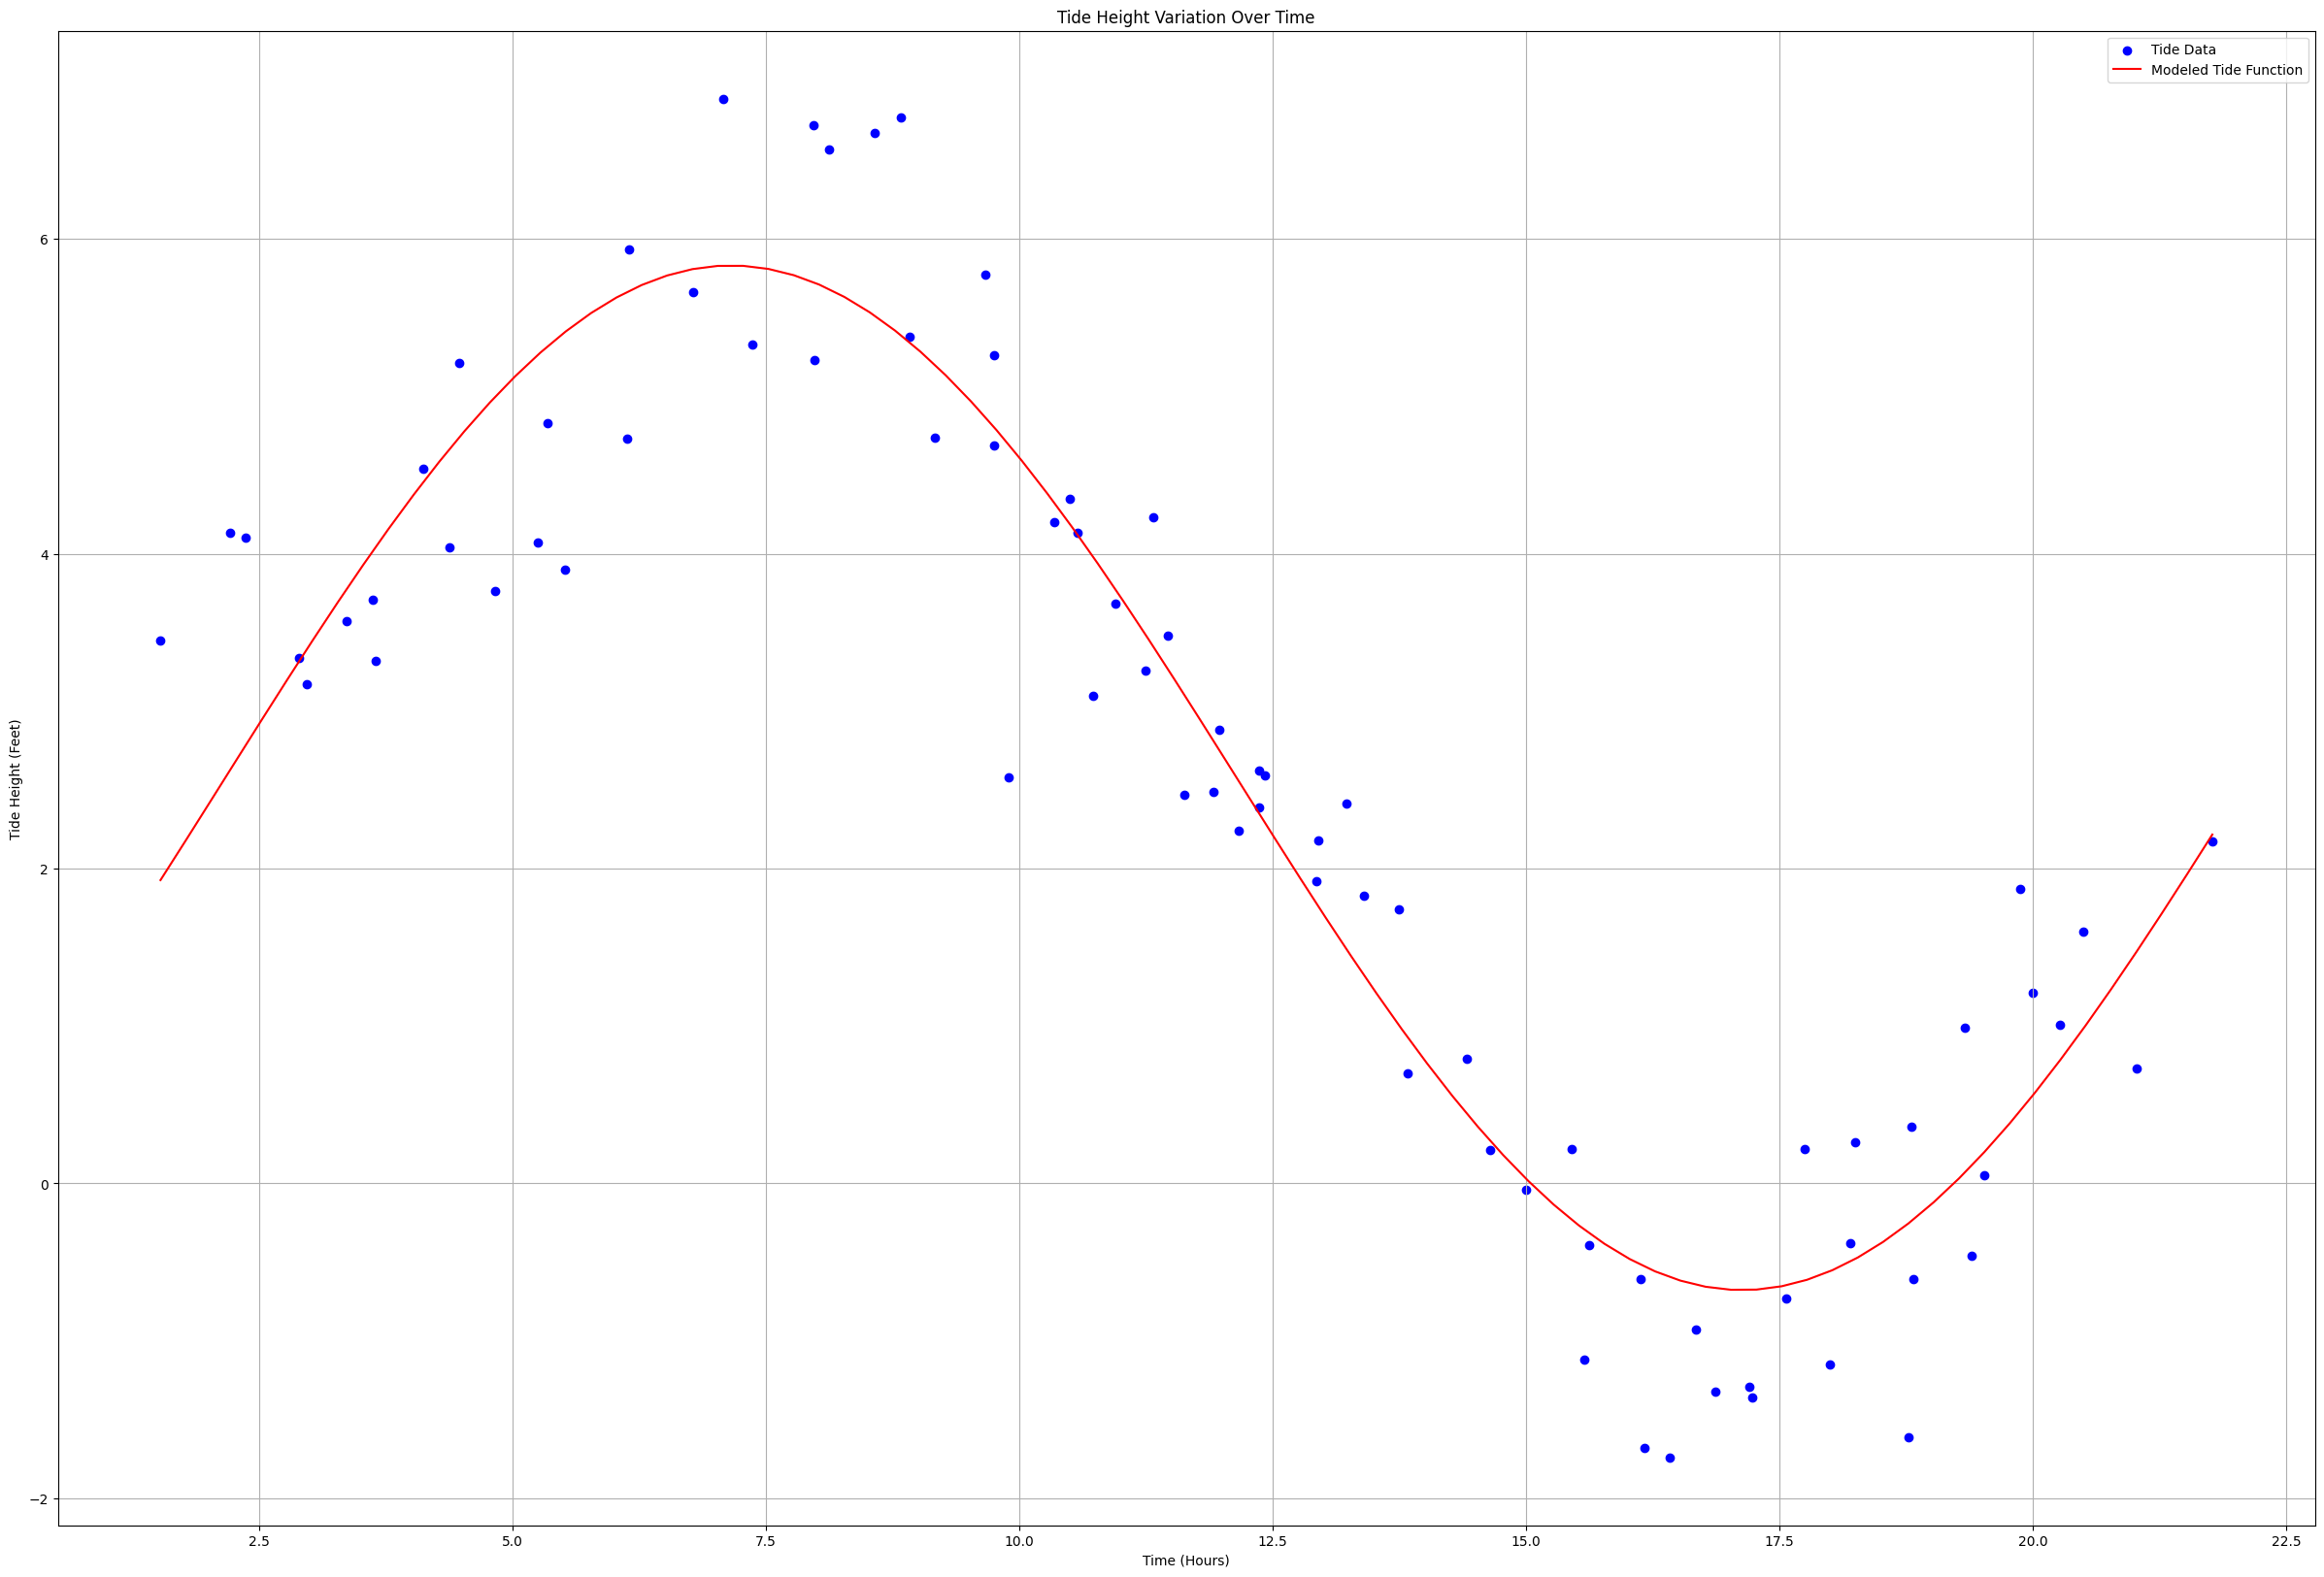

Fitted Parameters:
Amplitude: 3.254161053259271
Frequency: 0.050115339490855476
Phase: 5.600310663477337
Offset: 2.5766828191943323


<Figure size 640x480 with 0 Axes>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Reads from the dataset
data = np.genfromtxt("ASTR19_S22_group_project_data.txt",dtype = str, encoding = None)
#Splits the data into 3 seperate categories
c1,c2,c3 = np.hsplit(data,3)

c1 = c1.tolist()
c2 = c2.tolist()
c3 = c3.tolist()

#Converts data into list type
def list_convert(x):
    t=[]
    for i in range(len(x)):
        t.append(x[i][0])
    return t

days = list_convert(c1)
time = list_convert(c2)
tide_heights = list_convert(c3)

time = [i.split(':', 1) for i in time]

#Converts time into numerical value
def time_convert(x):
    p = []
    for i in range(len(x)):
        for j in range(1):
            p.append( round((float(x[i][j]) + float(x[i][j+1])/60 ),2) )
    return p

time_in_hours = time_convert(time)
days = [eval(i) for i in days]
tide_heights = [eval(i) for i in tide_heights]

#Oscillating Function
def tide_function(time, amplitude, frequency, phase, offset):
    return amplitude * np.sin((2 * np.pi) * frequency * time + phase) + offset

#Curve fitting
initial_guess = [7, 0.1, 0, 2.5]  # Initial guess for amplitude, frequency, phase, and offset
params, covariance = curve_fit(tide_function, time_in_hours, tide_heights, p0=initial_guess)

#Set fitted parameters
amplitude, frequency, phase, offset = params

#Creates values for model based on parameters
modeled_tide = tide_function(np.linspace(min(time_in_hours), max(time_in_hours), 82), *params)

#Plots the data and the modeled tide function
plt.figure(figsize=(30, 20))
plt.scatter(time_in_hours, tide_heights, label='Tide Data', color='blue')
plt.plot(np.linspace(min(time_in_hours), max(time_in_hours), 82), modeled_tide, label='Modeled Tide Function', color='red')
plt.title('Tide Height Variation Over Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Tide Height (Feet)')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("Tidal_Data_Graph.pdf")
#Prints the fitted parameters
print("Fitted Parameters:")
print(f"Amplitude: {amplitude}")
print(f"Frequency: {frequency}")
print(f"Phase: {phase}")
print(f"Offset: {offset}")

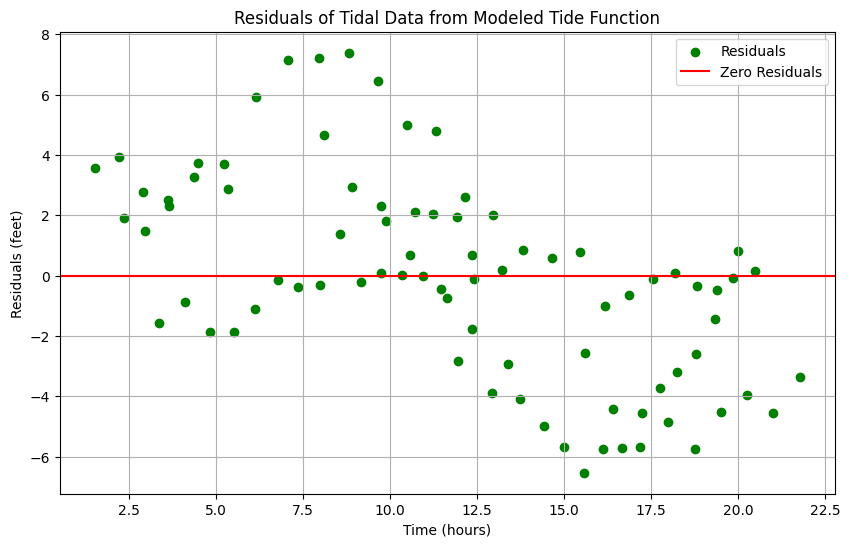

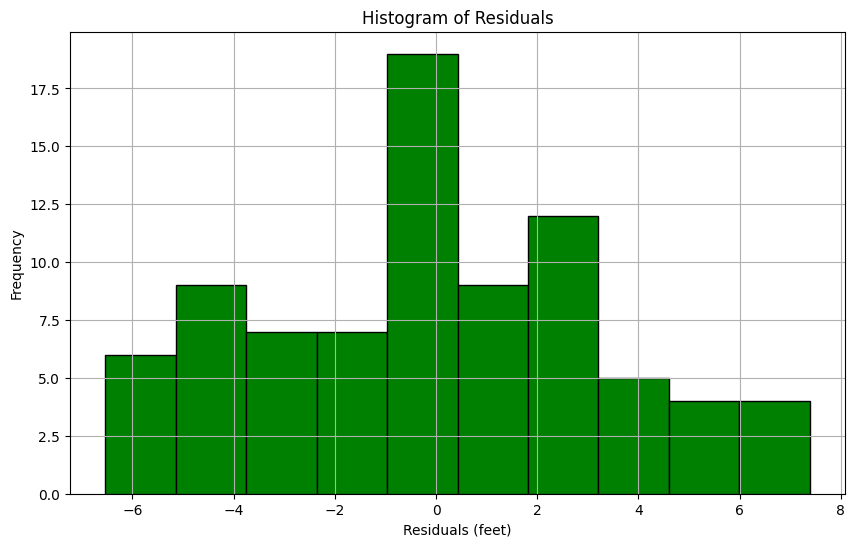

Standard Deviation of Residuals: 3.3438064586592064 feet


In [30]:
residuals = tide_heights - modeled_tide

# Plots residuals
plt.figure(figsize=(10, 6))
plt.scatter(time_in_hours, residuals, label='Residuals', color='green')
plt.axhline(0, color='red', label='Zero Residuals')
plt.title('Residuals of Tidal Data from Modeled Tide Function')
plt.xlabel('Time (hours)')
plt.ylabel('Residuals (feet)')
plt.legend()
plt.grid(True)
plt.show()

# Plots histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, color='green', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals (feet)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Measures standard deviation of residuals
std_dev_residuals = np.std(residuals)
print(f"Standard Deviation of Residuals: {std_dev_residuals} feet")